##**Data Preprocessing**

In [ ]:
#Importing Packages
import pandas as pd       #Useful for importing, manipulating, selection, cleaning data 
data_pd = pd.read_csv(r"C:\Users\Safura\Downloads\b_depressed.csv")  #Reading dataset from PC.
data_pd.head()

,Survey_id,Sex,Age,Married,Number_children,Education_level,Living_expenses,Other_expenses,Incoming_salary,Labor_primary,Lasting_investment,No_lasting_investment,Depressed
0,926,1,28,1,4,10,26692283,28203066,0,0,28411718,28292707.0,0
1,747,1,23,1,3,8,26692283,28203066,0,0,28411718,28292707.0,1
2,1190,1,22,1,3,9,26692283,28203066,0,0,28411718,28292707.0,0
3,1065,1,27,1,2,10,397715,44042267,0,0,7781123,69219765.0,0
4,806,0,59,0,4,10,80877619,74503502,1,1,20100562,43419447.0,0


In [ ]:
data_pd.dtypes            #Datatype of each attribute

Survey_id                  int64
Sex                        int64
Age                        int64
Married                    int64
Number_children            int64
Education_level            int64
Living_expenses            int64
Other_expenses             int64
Incoming_salary            int64
Labor_primary              int64
Lasting_investment         int64
No_lasting_investment    float64
Depressed                  int64
dtype: object

In [ ]:
data_pd.columns            #Colummns

Index(['Survey_id', 'Sex', 'Age', 'Married', 'Number_children',
       'Education_level', 'Living_expenses', 'Other_expenses',
       'Incoming_salary', 'Labor_primary', 'Lasting_investment',
       'No_lasting_investment', 'Depressed'],
      dtype='object')

In [ ]:
data_pd.groupby('Depressed').size()      #Number of depressed and not depressed people in dataset in INTEGER

Depressed
0    1191
1     238
dtype: int64

In [ ]:
fp = data_pd.groupby('Depressed').size()/data_pd.shape[0]  #Converted to float
print(fp)

Depressed
0    0.83345
1    0.16655
dtype: float64


In [ ]:
data_pd.mean(axis=0)       #Mean computed

Survey_id                7.150000e+02
Sex                      9.181246e-01
Age                      3.477747e+01
Married                  7.725682e-01
Number_children          2.883135e+00
Education_level          8.687194e+00
Living_expenses          3.248257e+07
Other_expenses           3.366632e+07
Incoming_salary          1.798460e-01
Labor_primary            2.134360e-01
Lasting_investment       3.299222e+07
No_lasting_investment    3.360385e+07
Depressed                1.665500e-01
dtype: float64

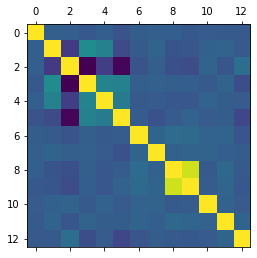

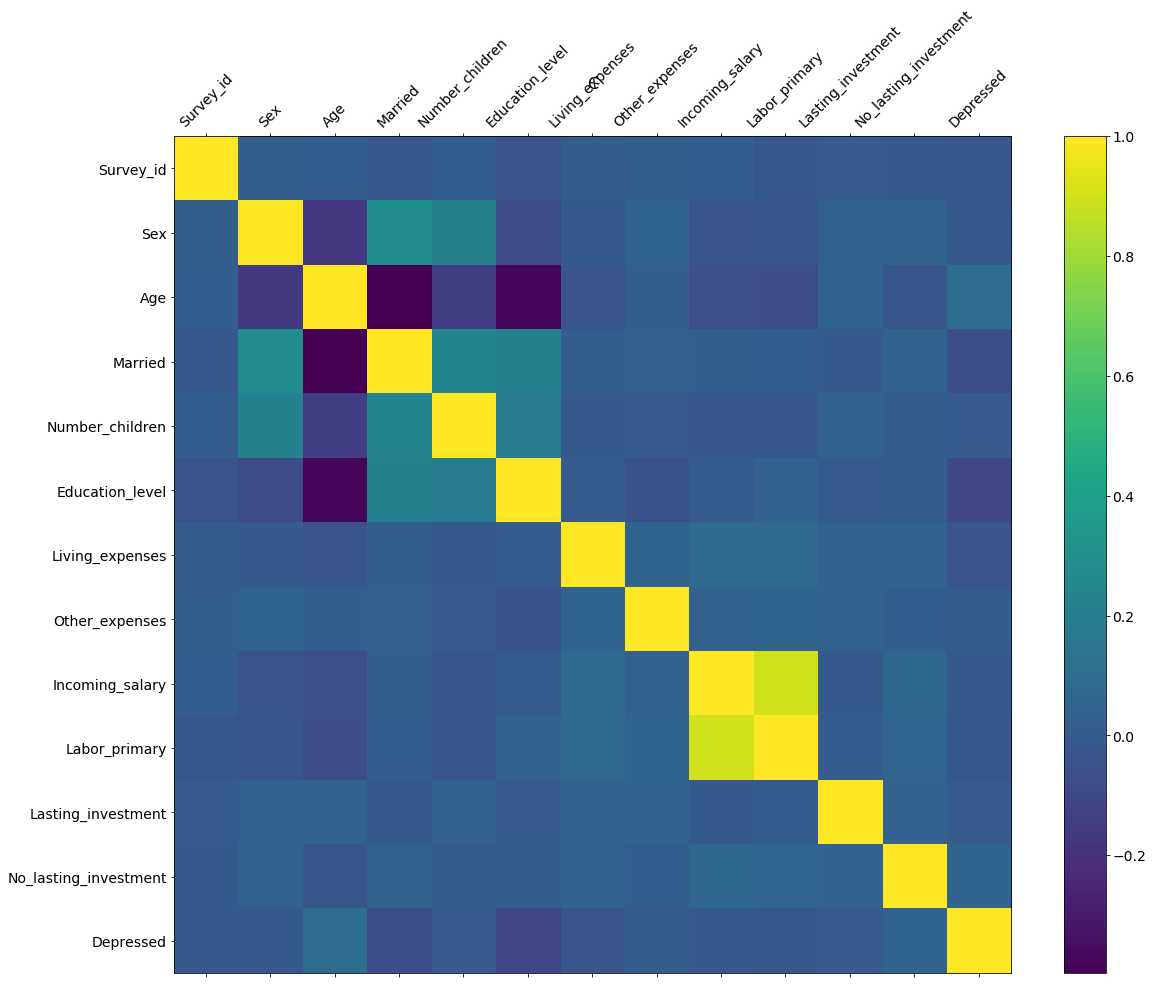

In [ ]:
#Plot of dataset 
#Import package
import matplotlib.pyplot as plt         #Useful for graphs, plots

plt.matshow(data_pd.corr())
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(data_pd.corr(), fignum=f.number)
plt.xticks(range(data_pd.shape[1]), data_pd.columns, fontsize=14, rotation=45)
plt.yticks(range(data_pd.shape[1]), data_pd.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('C',fontsize=16);

## **Data Description**

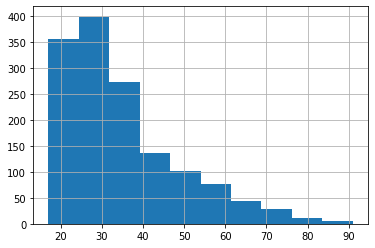

In [ ]:
hist = data_pd['Age'].hist()              #Distribution of depressed adults according to age.

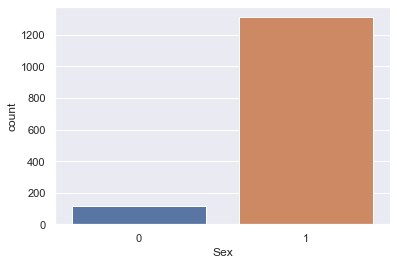

In [ ]:
#% matplotlib inline
import seaborn as sns
sns.set() 
sns.countplot(x='Sex', data = data_pd)   #Bar graph of sex(Female=1 and Male=0) distribution with positive depression 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


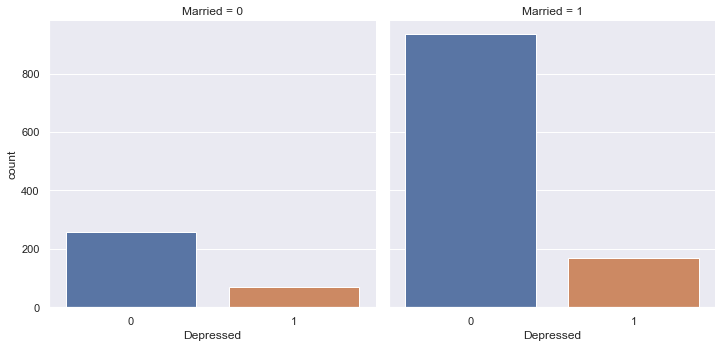

In [ ]:
sns.factorplot(x='Depressed', col='Married', kind='count', data= data_pd) #Bar graph of marital status with positive depression

## **Data Cleaning**

In [ ]:
#Data Cleaning
data_pd.No_lasting_investment.isnull().sum() #Number of null columns in No_lasting_investment

20

In [ ]:
data_pd['No_lasting_investment'].fillna(data_pd['No_lasting_investment'].median(), inplace=True)   #Fill null columns with median of column

In [ ]:
data_pd.No_lasting_investment.isnull().sum() #Check; No null values

0

In [ ]:
data_pd['No_lasting_investment'] = data_pd['No_lasting_investment'].astype(int)     #To INT

In [ ]:
data_pd

,Survey_id,Sex,Age,Married,Number_children,Education_level,Living_expenses,Other_expenses,Incoming_salary,Labor_primary,Lasting_investment,No_lasting_investment,Depressed
0,926,1,28,1,4,10,26692283,28203066,0,0,28411718,28292707,0
1,747,1,23,1,3,8,26692283,28203066,0,0,28411718,28292707,1
2,1190,1,22,1,3,9,26692283,28203066,0,0,28411718,28292707,0
3,1065,1,27,1,2,10,397715,44042267,0,0,7781123,69219765,0
4,806,0,59,0,4,10,80877619,74503502,1,1,20100562,43419447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,1,25,1,1,7,26692283,28203066,0,0,28411718,28292707,0
1425,547,1,28,1,4,10,10476722,71588707,0,0,1823477,47384361,0
1426,893,1,66,0,0,1,12545372,56534257,0,0,46444572,10454478,1
1427,363,1,51,1,1,12,26692283,28203066,0,0,28411718,28292707,0


In [ ]:
data_pd = data_pd.drop(['Survey_id'], axis=1)   #Drop unecessary column: Survey_id
data_pd.head(5)

,Sex,Age,Married,Number_children,Education_level,Living_expenses,Other_expenses,Incoming_salary,Labor_primary,Lasting_investment,No_lasting_investment,Depressed
0,1,28,1,4,10,26692283,28203066,0,0,28411718,28292707,0
1,1,23,1,3,8,26692283,28203066,0,0,28411718,28292707,1
2,1,22,1,3,9,26692283,28203066,0,0,28411718,28292707,0
3,1,27,1,2,10,397715,44042267,0,0,7781123,69219765,0
4,0,59,0,4,10,80877619,74503502,1,1,20100562,43419447,0


In [ ]:
X = data_pd.copy() #Copy of dataset assigned to varibale X

In [ ]:
X.head() 

,Sex,Age,Married,Number_children,Education_level,Living_expenses,Other_expenses,Incoming_salary,Labor_primary,Lasting_investment,No_lasting_investment,Depressed
0,1,28,1,4,10,26692283,28203066,0,0,28411718,28292707,0
1,1,23,1,3,8,26692283,28203066,0,0,28411718,28292707,1
2,1,22,1,3,9,26692283,28203066,0,0,28411718,28292707,0
3,1,27,1,2,10,397715,44042267,0,0,7781123,69219765,0
4,0,59,0,4,10,80877619,74503502,1,1,20100562,43419447,0


## **Data Mining**
### *KMeans, Naive Bayes , Logistic Regression and Random Forest*

### **KMeans**

In [ ]:
#Importing Packages 
from sklearn.cluster import KMeans                                    #KMeans clustering package
from sklearn.metrics import silhouette_samples, silhouette_score      #Metrics of evaluation

n_clusters = 1                                                        #Partition = 1
km = KMeans( n_clusters=n_clusters)
km.fit(X)                                                             #Function km fits X
y = km.predict(X)                                                     #Prediction
X.shape                                                               #Prints columns and rows

(1429, 12)

In [ ]:
pd.Series(y).value_counts()                                           #Calculates the size of Cluster

In [ ]:
km.cluster_centers_                                                   #List the centroids of the clusters

array([[9.18124563e-01, 3.47774668e+01, 7.72568230e-01, 2.88313506e+00,
        8.68719384e+00, 3.24825655e+07, 3.36663245e+07, 1.79846046e-01,
        2.13435969e-01, 3.29922151e+07, 3.35295168e+07, 1.66550035e-01]])

In [ ]:
# We decide to select some columns to separate the data and We can print the clusters very well created.

X_filtered = X.filter(['Living_expenses','Other_expenses','Lasting_investment','No_lasting_investmen']).values+15

In [ ]:
n_clusters = 3

km = KMeans( n_clusters=n_clusters)
km.fit(X_filtered)
y_filtered = km.predict(X_filtered)

print(X_filtered.shape)
print(y_filtered.shape)

km.cluster_centers_                                                 #Print the lists of the centroids

(1429, 3)
(1429,)


array([[30548534.09130436, 73912270.53478266, 38179768.46956524],
       [23974383.68704659, 25325746.676684  , 30183115.85181354],
       [69470788.32478629, 28504407.3076923 , 39477962.57264961]])

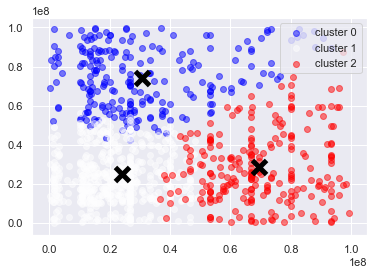

In [ ]:
# print the groups of the centroids
import numpy as np
cmap = plt.cm.plasma

cmap((y_filtered*255./(n_clusters-1)).astype(int))
for i in np.unique(y_filtered):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X_filtered[y_filtered==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()

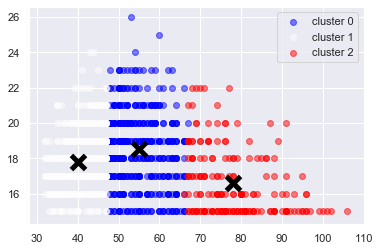

In [ ]:
X_filtered_2 = X.filter(['Age', 'Number_children', 'Education_level']).values+15


def plot_kmeans(n_clusters):
    km = KMeans( n_clusters=n_clusters)
    km.fit(X_filtered_2)
    y_filtered_2 = km.predict(X_filtered_2)

    cmap = plt.cm.plasma

    cmap((y_filtered*255./(n_clusters-1)).astype(int))
    for i in np.unique(y_filtered_2):
        cmap = plt.cm.bwr
        col = cmap((i*255./(n_clusters-1)).astype(int))
        Xr = X_filtered_2[y_filtered_2==i]
        plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
    plt.legend()

plot_kmeans(3)

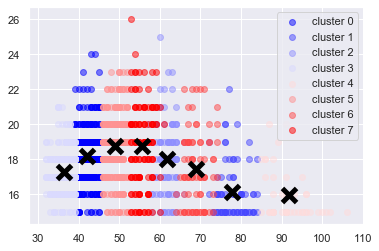

In [ ]:
plot_kmeans(8)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.utils.multiclass import unique_labels

X_filtered_3 = X.copy()

y_true = X_filtered_3['Depressed']
class_names = ['Depressed','No Depressed']

km = KMeans(n_clusters=2)
km = km.fit(X_filtered_2)
y_pred = km.labels_

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[911 280]
 [160  78]]


In [ ]:
def compute_purity(confusion_matrix):
    maximus = []
    purity_score = 0
    for i in range(0,confusion_matrix.shape[0]):
        maximus.append(np.max(cm[i]))
    purity_score = np.sum(maximus)/np.sum(confusion_matrix)
    return purity_score

In [ ]:
purity_score= compute_purity(cm)
print("The purity calculated is: ", purity_score)

The purity calculated is:  0.7494751574527642


In [ ]:
#Compute & print precision, recall and f1 score
precision = precision_score(y_true, y_pred, average='macro') 
recall = recall_score(y_true, y_pred, average='macro')  
f1score = f1_score(y_true, y_pred, average='macro')  

print("The Precision calculated was ", precision)
print("The Recall calculated was: ", recall)
print("The F1-Score calculated was: ", f1score)

The Precision calculated was  0.534242002201253
The Recall calculated was:  0.5463172674611406
The F1-Score calculated was:  0.5336134204451723


In [ ]:
X_copy = X.copy()
y = X.Depressed.values
X = X.values

### **Naive Bayes**

In [ ]:
#Split data in 70% training and 30% testing 
from sklearn.model_selection import train_test_split

X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X, y,
                                                    test_size=.3)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
model.fit(X_train_bayes, y_train_bayes)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_bayes = model.predict(X_test_bayes)

In [ ]:
cm = confusion_matrix(y_test_bayes, y_pred_bayes)
print(cm)
# Print the precision, recall and f1 score
print(classification_report(y_test_bayes, y_pred_bayes, digits=2))

[[357   0]
 [ 72   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       357
           1       0.00      0.00      0.00        72

    accuracy                           0.83       429
   macro avg       0.42      0.50      0.45       429
weighted avg       0.69      0.83      0.76       429



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regression**

In [ ]:
#Import package
from sklearn.linear_model import LogisticRegression                   #Logistic Regression Package

In [ ]:
classifier = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000, solver="liblinear")

classifier.fit(X_train_bayes, y_train_bayes)
y_pred_logistic = classifier.predict(X_test_bayes)
score = classifier.score(X_test_bayes, y_test_bayes)

In [ ]:
cm = confusion_matrix(y_test_bayes, y_pred_logistic)
print(cm)
# Print the precision, recall and f1 score
print(classification_report(y_test_bayes, y_pred_logistic, digits=2))

[[232 125]
 [ 46  26]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       357
           1       0.17      0.36      0.23        72

    accuracy                           0.60       429
   macro avg       0.50      0.51      0.48       429
weighted avg       0.72      0.60      0.65       429



### **Random Forest**

In [ ]:
#Import package 
from sklearn.ensemble import RandomForestClassifier                   #Random Forest Classsifier package


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[299   0]
 [  0  59]]


In [ ]:
#Print precision, recall and f1 score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00        59

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

